**First, I'll import the necessary libraries into the project.**

In [1]:
# This cell contains the necessary imports for the project to work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
def load(database_filepath):
    engine = create_engine(f'sqlite:///{database_filepath}')
    df_disaster_categories = pd.read_sql_table('disaster_categories', engine)
    df_disaster_categories = df_disaster_categories.drop(columns='id')
    return df_disaster_categories

In [4]:
data = load('DisasterResponse.db')

ValueError: Table disaster_categories not found

## **Getting the data**

**Now I will import the data that will be used.**

In [2]:
# Importing the data
df_categories = pd.read_csv('..\data\disaster_categories.csv')
df_messages = pd.read_csv('..\data\disaster_messages.csv')

**Now I'm going to take a look at each table and then join them.**

In [3]:
# Checking the first 5 rows
df_messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [4]:
# Checking the first 5 rows
df_categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [5]:
# Joining tables by id
df_merged = df_messages.merge(df_categories, how = 'inner', on = 'id')

## **Data understanding**

**As initial information, we have a dataset originating from the merger between a table that contains messages captured during disasters and another table with the category of these messages.**

**In this section, I will explore the already fused dataset to understand the data. First, I'll check the first few lines to see how the data looks and the shape of dataset.**

In [6]:
# Checking the first 5 rows
df_merged.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [7]:
# Checking the shape
df_merged.shape

(26386, 5)

**Here I have a table with 26386 rows and 5 columns.**

**The structure seems to be simple, with the message identifier, the translated message in English, the original message, the genre and its category.**

**From this, the ``original`` column can already be discarded, as it is more feasible to work with only the ``translated messages``, since they are all in the same language, have the same stopwords and grammatical structure. Working with messages in several different languages ​​would require more time to create a data processing for each language.**

**The ``genre`` column presents categories, let's check how many we have.**

<AxesSubplot: >

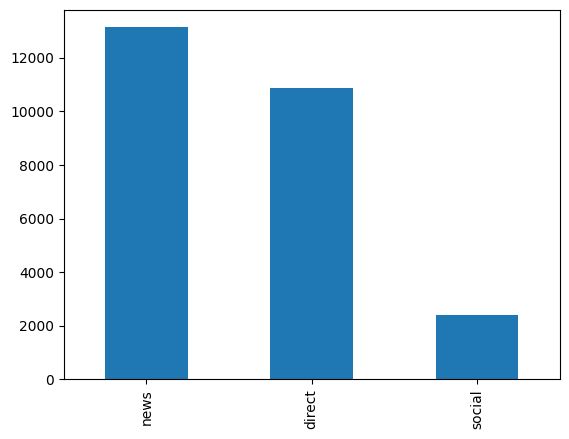

In [8]:
# Checking the graph with the number of times each category appears in the dataset
df_merged.genre.value_counts().plot(kind = 'bar')

**The representativeness of each category is good, with the exception of ``social``, which is a little unbalanced in relation to the others. This column will also be removed, because for the prediction that will be made in the future, only the text variable will be important.**

**The ``category`` column looks a bit messy, let's check some values ​​individually to try to understand.**

In [9]:
# Individually checking the first three rows
print("First row", "\n", df_merged.iloc[0, -1], "\n")
print("Second row", "\n", df_merged.iloc[1, -1], "\n")
print("Third row", "\n", df_merged.iloc[2, -1], "\n")

First row 
 related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0 

Second row 
 related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-1;floods-0;storm-1;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0 

Third row 
 related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_pr

**The column presents several internal categories separated by semicolons, with the indicators 0 and 1 next to each one, indicating if it belongs to that category or not.**

**Note that a value can be in more than one category.**

**Now, I'll check for missing values.**

In [10]:
# Counting missing values ​​in each column
df_merged.isna().sum()

id                0
message           0
original      16140
genre             0
categories        0
dtype: int64

**We can see that there are 16064 null values ​​in the ``original`` column. This is probably due to the fact that the original news is already in English. This number is not significant for us, because as previously explained, this column will not be used.**

**Now I will check if there are duplicate values.**

In [11]:
# Printing the results
print(f"Before applying drop duplicates() there were {df_merged.shape[0]} rows.")

print(f"After applying drop duplicates() there were {df_merged.drop_duplicates().shape[0]} rows.")

Before applying drop duplicates() there were 26386 rows.
After applying drop duplicates() there were 26216 rows.


**We can see that there are duplicate values ​​that were detected by drop_duplicates().**

In [12]:
# Printing the results
print(f"Using the Id as a subset, after applying drop_duplicates(), there are still {df_merged.drop_duplicates(subset='id').shape[0]} rows.")

print(f"Using the message as a subset, after applying drop_duplicates(), there are still {df_merged.drop_duplicates(subset='message').shape[0]} rows.")

Using the Id as a subset, after applying drop_duplicates(), there are still 26180 rows.
Using the message as a subset, after applying drop_duplicates(), there are still 26177 rows.


**When I use the ``Id`` and ``message`` as a subset in the drop duplicates, the number of records decreases even more, it means that there are duplicates in the dataset that drop_duplicates() is not detecting**

## **Data Modelling**

**After the data understanding stage, the following actions will be taken:**

1. **drop the column with the ``original`` texts, ``genre`` and ``id`` column.**
2. **split ``category`` column into new columns.**
3. **remove duplicate data.**

**As there are no numerical values ​​in the tables, with the exception of the Id, it will not be necessary to check for outliers. Likewise with missing values, which although they exist in the messages table, the column containing them will be dropped as previously justified.**

#### **Dropping unnecessary columns**

In [13]:
# Dropping the original column
df_merged = df_merged.drop(columns=['original', 'genre', 'id'])

**Now that we've dropped the unnecessary column, I'll remove the duplicate data.**

#### **Split category column into new columns**

**In this phase I will create new variables from column categories. As it is a column with a very large output, I will separate it from the dataframe to facilitate handling.**

In [14]:
# Separating column from dataframe
categories = df_merged.categories
df_merged = df_merged.drop(columns = 'categories')

In [15]:
# Dividing the values ​​and checking the result
categories = categories.str.split(';', expand= True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


**The result for now is good, but there are still some things to improve. Now I will strip the strings from the values ​​and use them to name the columns.**

In [16]:
# Extracting column values ​​and names
new_values = {}
new_columns_name = []
for col in categories.columns:
    new_values[col] =  [x[-1] for x in categories[col]]  
    new_columns_name.append(np.unique([x[:-2] for x in categories[col]])[0])
    
# Creating a dataframe with these values ​​and checking
new_categories = pd.DataFrame(new_values)
new_categories.columns = new_columns_name
new_categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Since the values ​​were strings, I'm going to change the format type to integer.**

In [17]:
# Changing the data type
new_categories = new_categories.astype('int')

**Remembering that there were records in our table with values ​​== 2 instead of 1 or 0. It will be corrected below.**

In [18]:
# Changing values ​​== 2 to 1
new_categories = new_categories.replace(2, 1)

**To finish this step, I will reset the dataframe indexes and concatenate them.**

In [19]:
# Resetting the indexes
df_merged = df_merged.reset_index().drop(columns = 'index')

# Merging the dataframes
df_merged = pd.concat([df_merged, new_categories], axis=1)

#### **Remove duplicate data**

**Before dropping, I'll perform a test**

In [20]:
print(f"The dataset has {df_merged.shape[0]} rows")
print(f"After the drop_duplicates, the table has {df_merged.drop_duplicates().shape[0]} rows")
print(f"After the drop_duplicates using the message as a subset, the table has {df_merged.drop_duplicates(subset='message').shape[0]} rows")

The dataset has 26386 rows
After the drop_duplicates, the table has 26214 rows
After the drop_duplicates using the message as a subset, the table has 26177 rows


**We can see, that we have obvious and non-obvious duplicates in our dataset. The non-obvious duplicates, which were detected when I used the ``subset`` parameter, are probably ambiguous phrases, which despite being the same, received a different classification.**

**I will choose to drop all duplicates, as it will not be good for the model to have ambiguous sentences, with more than one interpretation.**

In [21]:
# Dropping duplicated data
df_merged = df_merged.drop_duplicates()
df_cleaned = df_merged.drop_duplicates(subset='message')

In [22]:
# Checking for duplicate messages
df_cleaned.message.value_counts()

Weather update - a cold front from Cuba that could pass over Haiti                                                                                                                                                       1
Hundreds of shrimp production fields in the southern and southwestern coastal areas were washed away by the cyclone.                                                                                                     1
In several places, large craft are now sitting on dry land, in a dramatic display of Linda's gale-force winds.                                                                                                           1
Many schools in the coastal area of Aceh, Indonesia, were either totally destroyed or heavily damaged by the tsunami on December 26, 2004.                                                                               1
In fact, due to the extreme climactic conditions, the weak population density and the predominantly nomadic clan communities

## **Exporting to sql**

Now that the data is clean, I'm going to export it to a database.

In [23]:
# exporting to database
engine = create_engine('sqlite:///dbWords.db')
df_cleaned.to_sql('disaster_categories', engine, index=False)

26177